<a href="https://colab.research.google.com/github/Jaspinder26/Heart-and-Diabetes-Disease-Detection/blob/main/DetectingHeartDiseasewithRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
uploaded=files.upload()

Saving heart.csv to heart (1).csv


# New section

In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RestingBP'].plot(kind='hist', bins=20, title='RestingBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['FastingBS'].plot(kind='hist', bins=20, title='FastingBS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='RestingBP', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Cholesterol', y='FastingBS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='FastingBS', y='MaxHR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['RestingBP'].plot(kind='line', figsize=(8, 4), title='RestingBP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Cholesterol'].plot(kind='line', figsize=(8, 4), title='Cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['FastingBS'].plot(kind='line', figsize=(8, 4), title='FastingBS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
categories={
    'ChestPainType':['ATA','NAP','ASY','TA'],
    'Sex':['M','F'],
    'RestingECG':['Normal','ST','LVH'],
    'ExerciseAngina':['N','Y'],
    'ST_Slope':['Up','Flat','Down']
}
X=pd.get_dummies(X,columns=categories.keys())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
random_data={
    'Age':np.random.randint(20,80),
    'Sex':np.random.choice(categories['Sex']),
    'RestingECG':np.random.choice(categories['RestingECG']),
    'ExerciseAngina':np.random.choice(categories['ExerciseAngina']),
    'ST_Slope':np.random.choice(categories['ST_Slope']),
    'ChestPainType':np.random.choice(categories["ChestPainType"]),
    'RestingBP':np.random.randint(100,200),
    'Cholesterol':np.random.randint(100,300),
    'FastingBS':np.random.choice([0,1]),
    'MaxHR':np.random.randint(60,220),
    'Oldpeak':np.random.uniform(0,5)
}
random_df=pd.DataFrame([random_data])
random_df=pd.get_dummies(random_df,columns=categories.keys())
missing_cols=set(X_train.columns)-set(random_df.columns)
for feature in missing_cols:
  random_df[feature]=0
random_df=random_df[X_train.columns]
random_prediction=rf_classifier.predict(random_df)
def print_features(random_data):
  for feature,value in random_data.items():
    print(f"{feature}={value}")
print('Randomly Generated Patient Data:')
print_features(random_data)
if random_prediction[0]==1:
  print('Heart Disease Detected')
else:
  print('Normal')

Randomly Generated Patient Data:
Age=35
Sex=M
RestingECG=LVH
ExerciseAngina=Y
ST_Slope=Down
ChestPainType=TA
RestingBP=112
Cholesterol=121
FastingBS=0
MaxHR=186
Oldpeak=0.15831472329391083
Heart Disease Detected


In [ ]:
acc_train=rf_classifier.score(X_train,y_train)
acc_test=rf_classifier.score(X_test,y_test)
print(acc_train)
print(acc_test)

1.0
0.8641304347826086


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66 11]
 [14 93]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



ValueError: x and y must be the same size

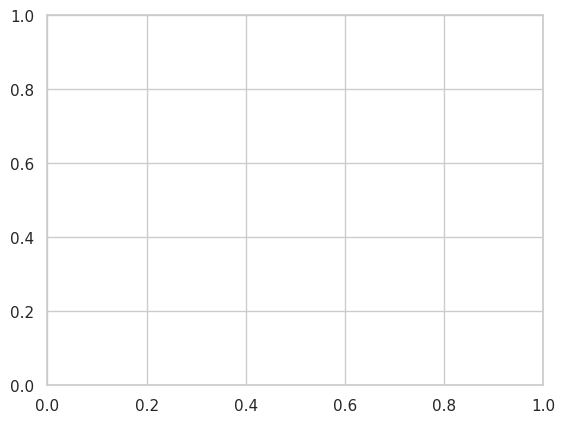

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.scatter(X_train,y_train)